# Analysis of Factors Affecting Job Applications and Views on LinkedIn

## Context
In the dynamic landscape of job hunting and recruitment, understanding what makes a job posting successful is crucial for both job seekers and employers. This project aims to uncover the underlying factors that contribute to the effectiveness of job postings on LinkedIn, measured in terms of the number of applications and views each posting receives.

## Methodology
My analysis began with a comprehensive dataset of LinkedIn job postings, encompassing various features such as follower count, remote work availability, pay periods, experience levels, and compensation details. I employed a multifaceted approach to my analysis, including:

- **Data Cleaning and Preparation:** Handling missing values, encoding categorical variables, and ensuring data consistency.
- **Feature Engineering:** Creating new variables, such as an average salary measure and indicators for the presence of specific job attributes.
- **Exploratory Data Analysis (EDA):** Visualizing distributions, identifying patterns, and exploring relationships between different variables.
- **Regression Analysis:** Implementing linear regression models to quantify the impact of various factors on the number of applications and views.

## Key Findings
- **Follower Count's Limited Influence:** Contrary to expectations, the follower count of the posting company does not significantly impact the number of applications received.
- **Significant Impact of Remote Work:** Job postings that allow for remote work attract significantly more applications and views, underscoring the growing preference for flexibility among job seekers.
- **The Role of Common Keywords:** While there is a set of frequently used words in job descriptions, their presence correlates with higher applications and views only up to a certain frequency. This suggests that while specific language can draw attention, it is not the sole determinant of a posting's success.
- **Influence of Job Characteristics:** Several factors emerged as more influential, including the option for remote work, multiple pay periods, targeting associate or internship experience levels, and offering hourly compensation. These elements cater to diverse job seeker preferences and practical considerations.
- **Nuanced Role of Salary:** At a broad level, salary details do not universally predict a posting's success, likely due to varied expectations among job seekers. However, it is posited that a more detailed analysis within specific job categories or levels would reveal a stronger relationship between compensation and job application behavior.

## Conclusion
My findings offer valuable insights into what makes a job posting on LinkedIn successful. While some factors such as remote work availability and job characteristics significantly affect applications and views, others like follower count and salary details play more nuanced roles. These insights can guide employers in crafting more effective job postings and inform job seekers about the traits of appealing job offers.

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Imports
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)

# Read in the data
df = pd.read_csv('job_postings.csv')
emp_count_df = pd.read_csv('company_details/employee_counts.csv')

# Merge the dataframes
merged_df = df.merge(emp_count_df, how='left', on='company_id')

merged_df

/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_13980/253101368.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped,employee_count,follower_count,time_recorded
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,1.699090e+12,NaN,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,1.701680e+12,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101,1171.0,11417.0,1.699131e+09
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,1.699080e+12,NaN,NaN,https://www.linkedin.com/jobs/view/3757940025/...,https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...,OffsiteApply,1.701680e+12,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420,300.0,2923.0,1.699085e+09
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,1.699080e+12,NaN,NaN,https://www.linkedin.com/jobs/view/3757938019/...,https://www.click2apply.net/LwbOykH2yAJdahB5Ah...,OffsiteApply,1.701680e+12,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644,314.0,8487.0,1.699086e+09
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,1.699080e+12,NaN,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,1.701680e+12,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461,36.0,305.0,1.692864e+09
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,1.698970e+12,1.0,NaN,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,OffsiteApply,1.701680e+12,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346,1227.0,51933.0,1.692864e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66367,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,1.692830e+12,NaN,NaN,https://www.linkedin.com/jobs/view/133114754/?...,NaN,ComplexOnsiteApply,1.695430e+12,NaN,NaN,NaN,1.692830e+12,NaN,0,FULL_TIME,NaN,NaN,1,15.0,159.0,1.692835e+09
66368,108965123,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",2.0,1.699040e+12,NaN,4.0,https://www.linkedin.com/jobs/view/108965123/?...,NaN,ComplexOnsiteApply,1.701630e+12,NaN,NaN,NaN,1.699040e+12,NaN,0,FULL_TIME,NaN,NaN,1699044401,NaN,NaN,NaN
66369,102339515,52132271.0,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,Greater Boston,NaN,1.699050e+12,NaN,NaN,https://www.linkedin.com/jobs/view/102339515/?...,NaN,SimpleOnsiteApply,1.701640e+12,NaN,NaN,NaN,1.699050e+12,NaN,0,FULL_TIME,NaN,NaN,1699063495,7.0,28.0,1.699063e+09
66370,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,1.692750e+12,NaN,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,NaN,ComplexOnsiteApply,1.708300e+12,NaN,NaN,NaN,1.692750e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,1,NaN,NaN,NaN


In [2]:
merged_df.dropna(subset=['follower_count'], inplace=True)
merged_df['applies'] = merged_df['applies'].fillna(0)
merged_df['remote_allowed'] = merged_df['remote_allowed'].fillna(0)
print(merged_df['follower_count'].isna().sum())
print(merged_df['applies'].isna().sum())
print(merged_df['remote_allowed'].isna().sum())

0
0
0


In [3]:
time_columns = ['original_listed_time', 'closed_time', 'expiry', 'listed_time', 'time_recorded']

for column in time_columns:
    merged_df[column] = pd.to_datetime(merged_df[column], unit='ms')

cat_columns = ['pay_period', 'formatted_work_type', 'application_type', 'formatted_experience_level', 'work_type', 'compensation_type']
merged_df = pd.get_dummies(merged_df, columns=cat_columns)

merged_df.head(5)    

,job_id,company_id,title,description,max_salary,med_salary,min_salary,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,expiry,closed_time,skills_desc,listed_time,posting_domain,sponsored,currency,scraped,employee_count,follower_count,time_recorded,pay_period_HOURLY,pay_period_MONTHLY,pay_period_ONCE,pay_period_WEEKLY,pay_period_YEARLY,formatted_work_type_Contract,formatted_work_type_Full-time,formatted_work_type_Internship,formatted_work_type_Other,formatted_work_type_Part-time,formatted_work_type_Temporary,formatted_work_type_Volunteer,application_type_ComplexOnsiteApply,application_type_OffsiteApply,application_type_SimpleOnsiteApply,formatted_experience_level_Associate,formatted_experience_level_Director,formatted_experience_level_Entry level,formatted_experience_level_Executive,formatted_experience_level_Internship,formatted_experience_level_Mid-Senior level,work_type_CONTRACT,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,work_type_TEMPORARY,work_type_VOLUNTEER,compensation_type_BASE_SALARY
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,"Little River, SC",0.0,2023-11-04 09:26:40,0.0,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,2023-12-04 08:53:20,NaT,NaN,2023-11-04 09:26:40,careers-demant.icims.com,0,USD,1699138101,1171.0,11417.0,1970-01-20 15:58:51.481,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,"Beaver Dam, WI",0.0,2023-11-04 06:40:00,0.0,NaN,https://www.linkedin.com/jobs/view/3757940025/...,https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...,2023-12-04 08:53:20,NaT,NaN,2023-11-04 06:40:00,www.click2apply.net,0,NaN,1699085420,300.0,2923.0,1970-01-20 15:58:05.420,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,"Bessemer, AL",0.0,2023-11-04 06:40:00,0.0,NaN,https://www.linkedin.com/jobs/view/3757938019/...,https://www.click2apply.net/LwbOykH2yAJdahB5Ah...,2023-12-04 08:53:20,NaT,Bachelor's Degree in Mechanical Engineering pr...,2023-11-04 06:40:00,www.click2apply.net,0,NaN,1699085644,314.0,8487.0,1970-01-20 15:58:05.644,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,"Aliso Viejo, CA",0.0,2023-11-04 06:40:00,0.0,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,2023-12-04 08:53:20,NaT,NaN,2023-11-04 06:40:00,jobs.apploi.com,0,USD,1699087461,36.0,305.0,1970-01-20 14:14:23.696,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,United States,0.0,2023-11-03 00:06:40,1.0,NaN,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,2023-12-04 08:53:20,NaT,NaN,2023-11-04 09:26:40,careers.iherb.com,0,USD,1699085346,1227.0,51933.0,1970-01-20 14:14:23.726,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True


In [5]:
# Make sure you have the stopwords dataset downloaded
nltk.download('stopwords')

# Assuming 'merged_df' is your DataFrame and it has 'views', 'applies', and 'description' columns
# Step 1: Identify Top 50 Jobs
top_jobs = merged_df.nlargest(50, ['views', 'applies'])

# Step 2: Create a Corpus
corpus = ' '.join(top_jobs['description'])

# Step 3: Tokenize and Clean
words = nltk.word_tokenize(corpus)
words = [word.lower() for word in words if word.isalpha()]  # Keep words that are purely alphabetical
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# Step 4: Find Most Common Words
# This will exclude the top 100 most common words to avoid exceptionally common words
common_words = [word for word, word_count in Counter(words).most_common()[100:]]

# Step 5: Count Common Words in Each Description
def count_common_words(description, common_words):
    description_words = nltk.word_tokenize(description)
    description_words = [word.lower() for word in description_words if word.isalpha()]
    description_words = [word for word in description_words if word not in stop_words]
    return sum(word in common_words for word in description_words)

# Step 6: Create a New Column
merged_df.dropna(subset=['description'], inplace=True)
merged_df['common_word_count'] = merged_df['description'].apply(lambda desc: count_common_words(desc, common_words))

[nltk_data] Downloading package stopwords to /Users/jevan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
common_words

['technical',
 'need',
 'understanding',
 'github',
 'manager',
 'develop',
 'package',
 'make',
 'one',
 'reporting',
 'professional',
 'level',
 'individual',
 'gender',
 'national',
 'degree',
 'vision',
 'diverse',
 'may',
 'systems',
 'use',
 'impact',
 'improvement',
 'performance',
 'system',
 'field',
 'complex',
 'training',
 'providing',
 'industry',
 'remote',
 'global',
 'talent',
 'build',
 'create',
 'future',
 'required',
 'practices',
 'year',
 'leading',
 'world',
 'employment',
 'offer',
 'culture',
 'operational',
 'competitive',
 'executive',
 'depending',
 'critical',
 'life',
 'creative',
 'power',
 'community',
 'healthcare',
 'part',
 'internal',
 'platform',
 'knowledge',
 'products',
 'quickly',
 'director',
 'issues',
 'metrics',
 'looking',
 'join',
 'implementation',
 'services',
 'track',
 'lead',
 'every',
 'identity',
 'get',
 'goals',
 'analysis',
 'well',
 'deliver',
 'eligible',
 'members',
 'growing',
 'external',
 'bonus',
 'equal',
 'protected',
 '

In [7]:
merged_df['advertised_duration'] = merged_df['expiry'] - merged_df['original_listed_time']
merged_df['advertised_duration'] = merged_df['advertised_duration'].dt.days

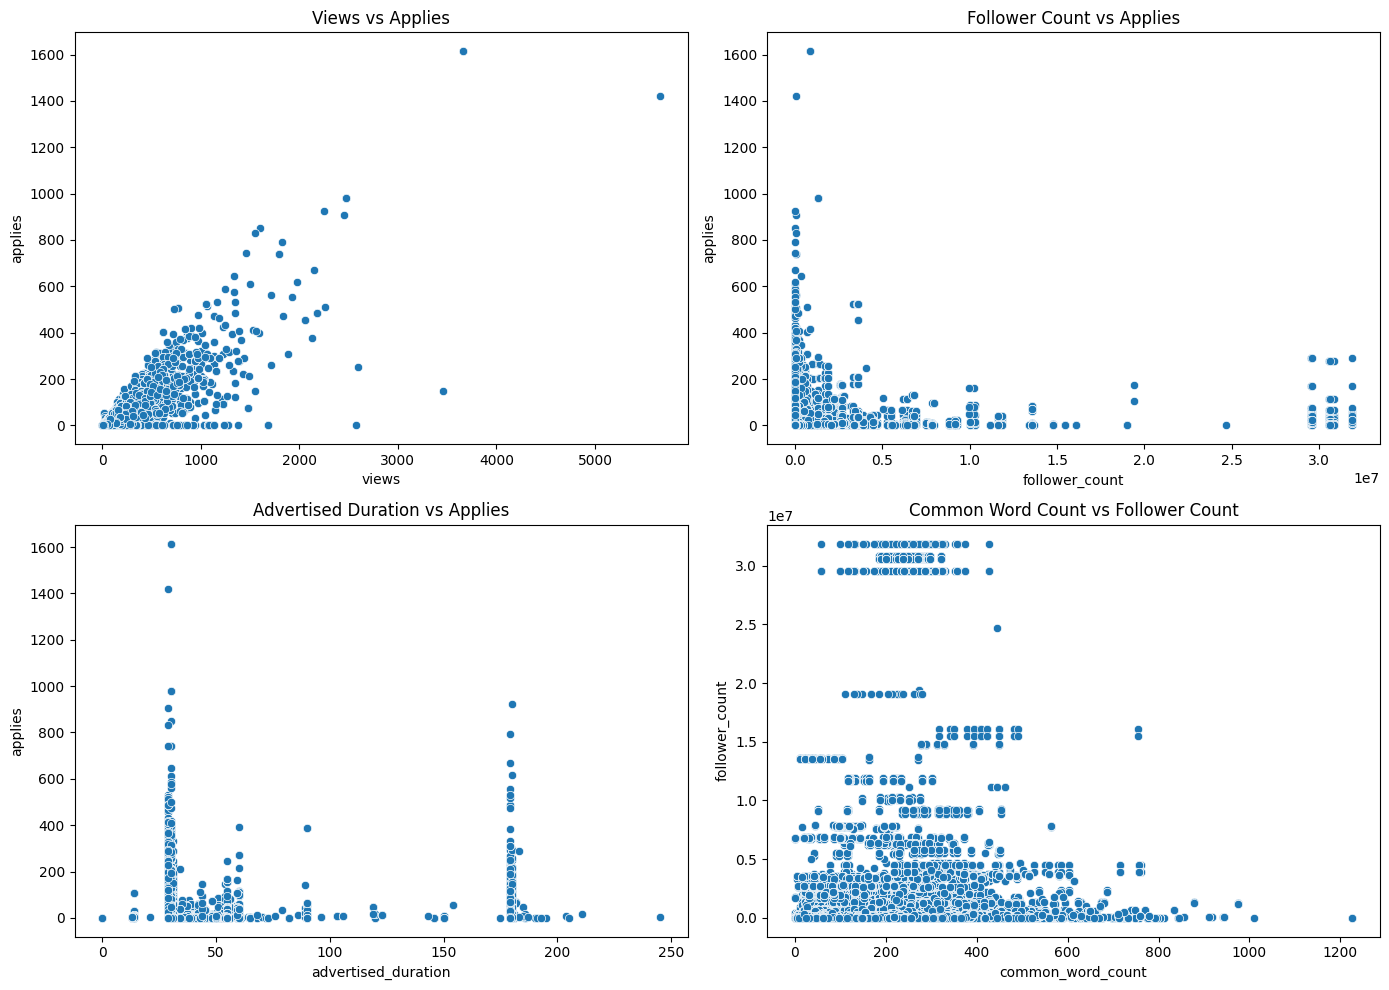

In [8]:
# Now let's create the scatter plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot for views vs applies
sns.scatterplot(data=merged_df, x='views', y='applies', ax=axs[0, 0])
axs[0, 0].set_title('Views vs Applies')

# Scatter plot for follower_count vs applies
sns.scatterplot(data=merged_df, x='follower_count', y='applies', ax=axs[0, 1])
axs[0, 1].set_title('Follower Count vs Applies')

# Scatter plot for advertised_duration vs applies
sns.scatterplot(data=merged_df, x='advertised_duration', y='applies', ax=axs[1, 0])
axs[1, 0].set_title('Advertised Duration vs Applies')

# Scatter plot for common_word_count vs follower_count
sns.scatterplot(data=merged_df, x='common_word_count', y='follower_count', ax=axs[1, 1])
axs[1, 1].set_title('Common Word Count vs Follower Count')

plt.tight_layout()
plt.show()

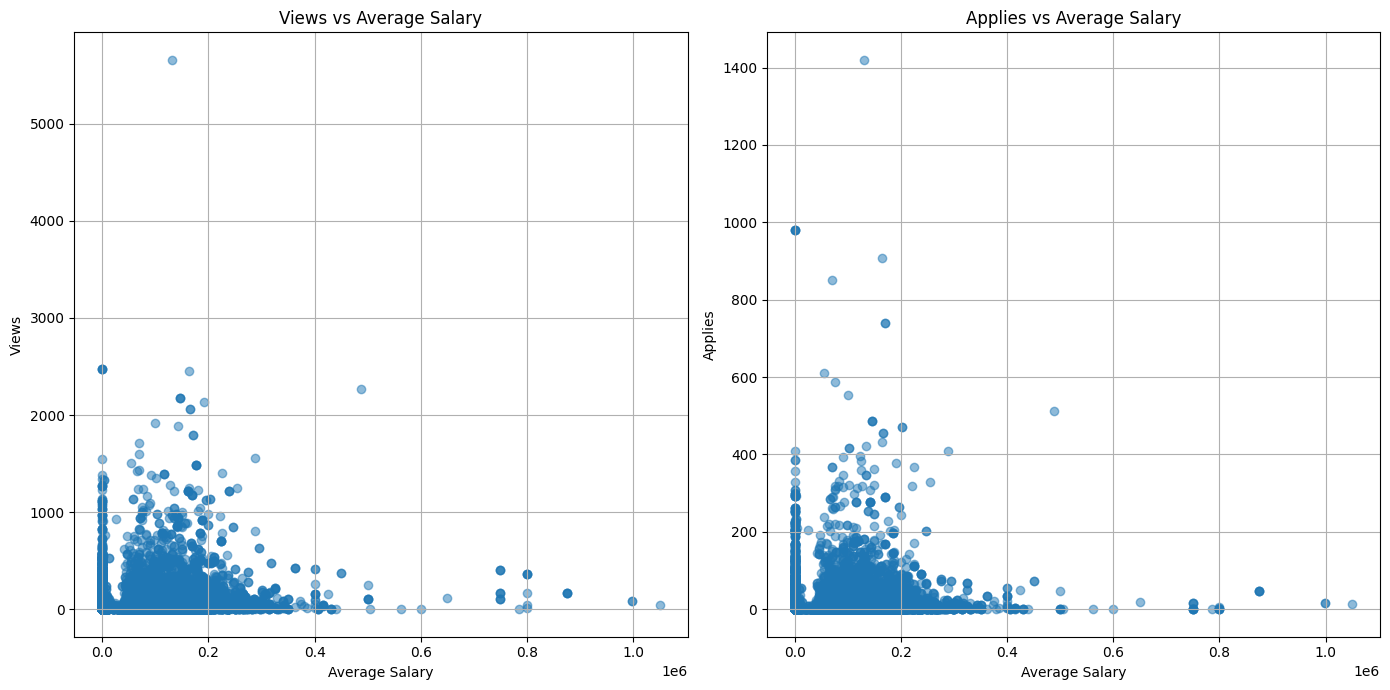

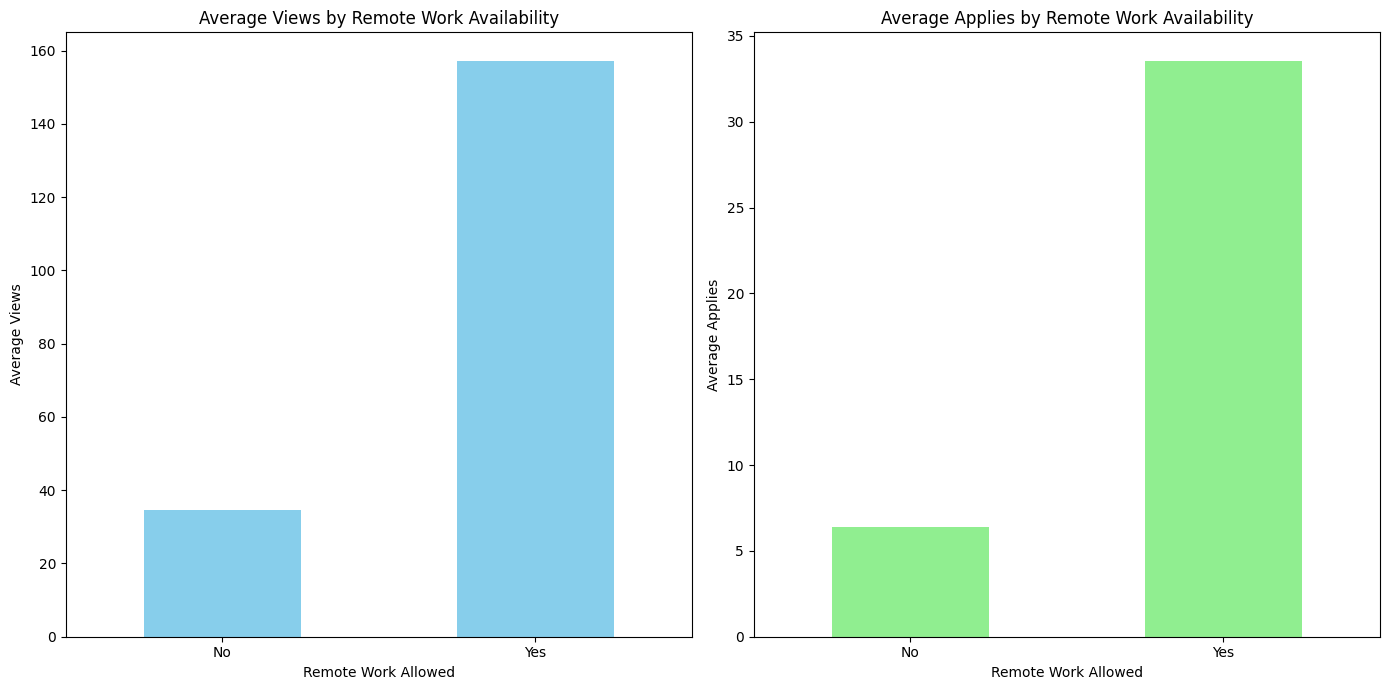

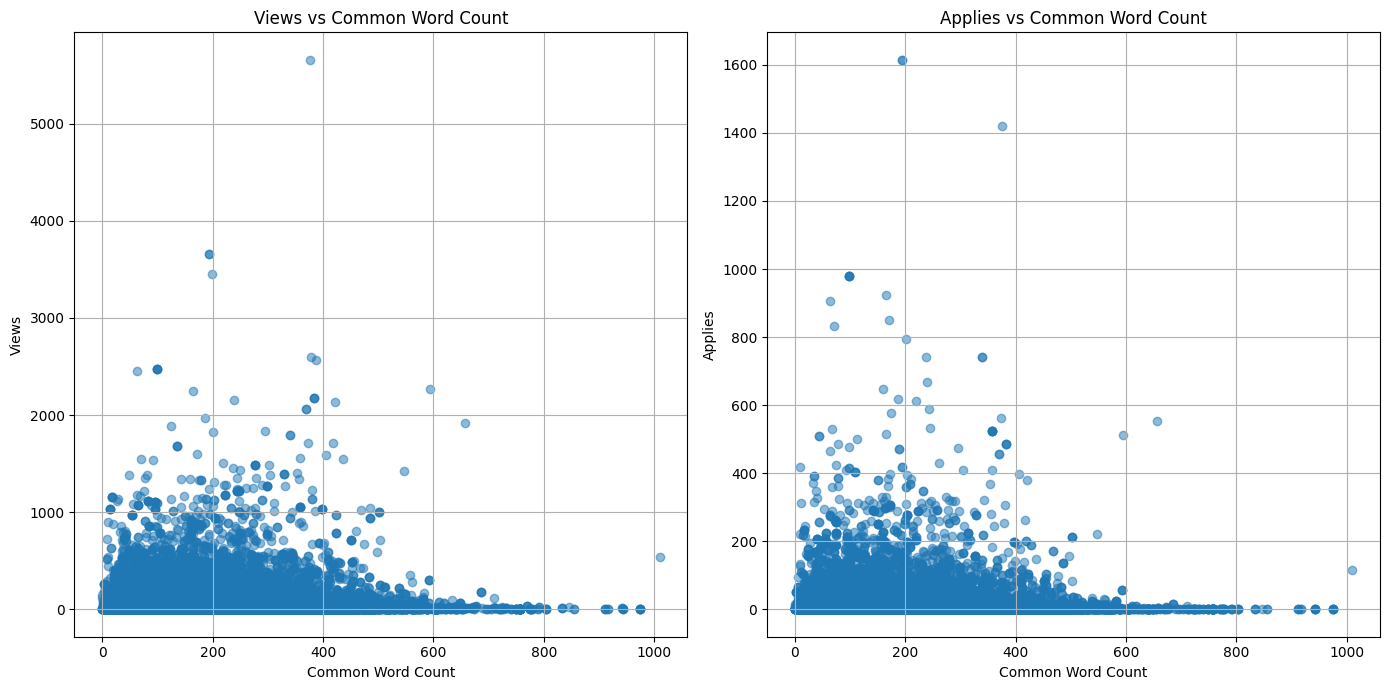

In [9]:
# Create an average salary column with min and max salary, or use med salary
merged_df['average_salary'] = merged_df.apply(
    lambda row: np.mean([row['min_salary'], row['max_salary']]) 
    if pd.notna(row['min_salary']) and pd.notna(row['max_salary']) 
    else row['med_salary'], axis=1
)

# For the EDA, we will create plots to answer the questions. We'll start with views and applies by average salary.

# First, we remove entries with no salary and no views or applies data for accurate plotting
salary_merged_df = merged_df.dropna(subset=['average_salary', 'views', 'applies'])

# Plotting the relationship between average salary and views
plt.figure(figsize=(14, 7))

# Views vs Average Salary
plt.subplot(1, 2, 1)
plt.scatter(salary_merged_df['average_salary'], salary_merged_df['views'], alpha=0.5)
plt.title('Views vs Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Views')
#plt.xscale('log')  # Using a log scale due to wide range of salaries
#plt.yscale('log')  # Log scale for better visibility of data spread
plt.grid(True)

# Applies vs Average Salary
plt.subplot(1, 2, 2)
plt.scatter(salary_merged_df['average_salary'], salary_merged_df['applies'], alpha=0.5)
plt.title('Applies vs Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Applies')
#plt.xscale('log')  # Using a log scale due to wide range of salaries
#plt.yscale('log')  # Log scale for better visibility of data spread
plt.grid(True)

plt.tight_layout()
plt.show()

# Now, let's examine the impact of remote work availability on views and applies
remote_merged_df = merged_df.dropna(subset=['remote_allowed', 'views', 'applies'])

# Plotting remote work availability against views and applies
plt.figure(figsize=(14, 7))

# Views vs Remote Allowed
plt.subplot(1, 2, 1)
remote_merged_df.groupby('remote_allowed')['views'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Views by Remote Work Availability')
plt.xlabel('Remote Work Allowed')
plt.ylabel('Average Views')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

# Applies vs Remote Allowed
plt.subplot(1, 2, 2)
remote_merged_df.groupby('remote_allowed')['applies'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Applies by Remote Work Availability')
plt.xlabel('Remote Work Allowed')
plt.ylabel('Average Applies')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()

# Finally, we will look at the impact of common word count on views and applies
# For this, we'll need to ensure common_word_count, views, and applies don't have NA values
word_count_merged_df = merged_df.dropna(subset=['common_word_count', 'views', 'applies'])

# Plotting common word count against views and applies
plt.figure(figsize=(14, 7))

# Views vs Common Word Count
plt.subplot(1, 2, 1)
plt.scatter(word_count_merged_df['common_word_count'], word_count_merged_df['views'], alpha=0.5)
plt.title('Views vs Common Word Count')
plt.xlabel('Common Word Count')
plt.ylabel('Views')
#plt.yscale('log')  # Log scale for better visibility of data spread
plt.grid(True)

# Applies vs Common Word Count
plt.subplot(1, 2, 2)
plt.scatter(word_count_merged_df['common_word_count'], word_count_merged_df['applies'], alpha=0.5)
plt.title('Applies vs Common Word Count')
plt.xlabel('Common Word Count')
plt.ylabel('Applies')
#plt.yscale('log')  # Log scale for better visibility of data spread
plt.grid(True)

plt.tight_layout()
plt.show()

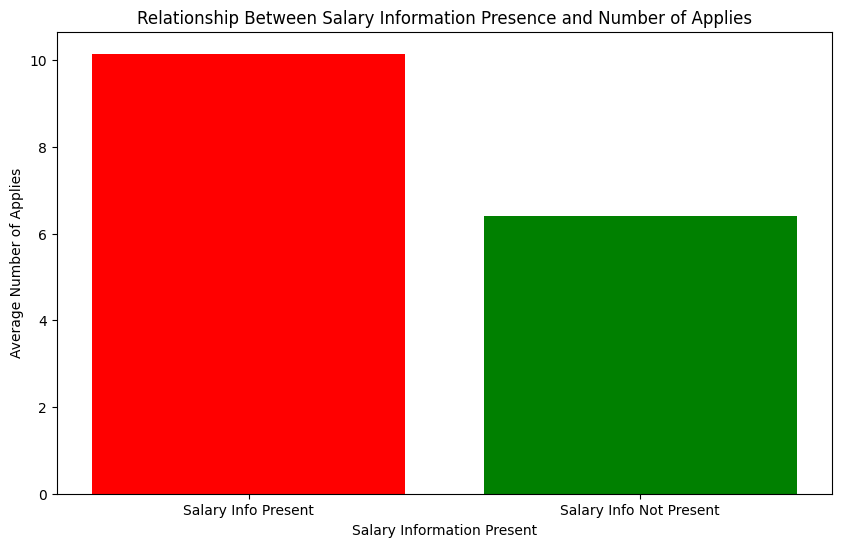

In [10]:
# Create a new column that denotes whether all 3 salary columns are all NaN or not
# We'll use 1 to denote rows where salary information is present, and 0 where it's not
merged_df['salary_info_not_present'] = ((merged_df['min_salary'].isna()) & 
                             (merged_df['max_salary'].isna()) & 
                             (merged_df['med_salary'].isna())).astype(int)


# # Assuming 'merged_df' is your DataFrame
# merged_df['min_salary_present'] = merged_df['min_salary'].notna().astype(int)
# merged_df['max_salary_present'] = merged_df['max_salary'].notna().astype(int)
# merged_df['med_salary_present'] = merged_df['med_salary'].notna().astype(int)

# # You can fill the missing salary values with a placeholder if necessary for model training
# # For example, you might fill missing values with -1 or a value that indicates missing data
# merged_df['min_salary'].fillna(-1, inplace=True)
# merged_df['max_salary'].fillna(-1, inplace=True)
# merged_df['med_salary'].fillna(-1, inplace=True)


# Now, we will plot 'salary_info_present' vs 'applies'
# Group by the 'salary_info_present' column and calculate the average number of applies
salary_presence_vs_applies = merged_df.groupby('salary_info_not_present')['applies'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(salary_presence_vs_applies['salary_info_not_present'].astype(str), 
        salary_presence_vs_applies['applies'], 
        color=['red', 'green'])
plt.xlabel('Salary Information Present')
plt.ylabel('Average Number of Applies')
plt.title('Relationship Between Salary Information Presence and Number of Applies')
plt.xticks(ticks=[0, 1], labels=['Salary Info Present', 'Salary Info Not Present'])  # Set the x-ticks to correspond to salary info presence
plt.show()


In [11]:
#merged_df = pd.read_csv('complete_merged_linkedin_df.csv')

In [32]:
# First, we'll create a list of columns for the regression.
columns_for_regression = [
    'formatted_experience_level_Associate',
    'formatted_experience_level_Director',
    'formatted_experience_level_Entry level',
    'formatted_experience_level_Executive',
    'formatted_experience_level_Internship',
    'formatted_experience_level_Mid-Senior level',
    'work_type_CONTRACT',
    'work_type_FULL_TIME',
    'work_type_INTERNSHIP',
    'work_type_OTHER',
    'work_type_PART_TIME',
    'work_type_TEMPORARY',
    'work_type_VOLUNTEER',
    'compensation_type_BASE_SALARY',
    'pay_period_HOURLY',
    'pay_period_MONTHLY',
    'pay_period_ONCE',
    'pay_period_WEEKLY',
    'pay_period_YEARLY',
    'formatted_work_type_Contract',
    'formatted_work_type_Full-time',
    'formatted_work_type_Internship',
    'formatted_work_type_Other',
    'formatted_work_type_Part-time',
    'formatted_work_type_Temporary',
    'formatted_work_type_Volunteer',
    'application_type_ComplexOnsiteApply',
    'application_type_OffsiteApply',
    'application_type_SimpleOnsiteApply',
    'salary_info_not_present',  # Ensure this is correctly calculated as in the previous steps
    'max_salary',
    'min_salary',
    'med_salary',
    'follower_count',
    'remote_allowed',  # This should be encoded as 0 or 1 if it's categorical
    'advertised_duration',  # This should be calculated as mentioned before
    'common_word_count',
    'employee_count',  # Ensure this is numeric
    'sponsored'  # This should be encoded as 0 or 1 if it's categorical
]

# Assuming 'merged_df' is your DataFrame
merged_df['min_salary_present'] = merged_df['min_salary'].notna().astype(int)
merged_df['max_salary_present'] = merged_df['max_salary'].notna().astype(int)
merged_df['med_salary_present'] = merged_df['med_salary'].notna().astype(int)

# You can fill the missing salary values with a placeholder if necessary for model training
# For example, you might fill missing values with -1 or a value that indicates missing data
merged_df['min_salary'].fillna(0, inplace=True)
merged_df['max_salary'].fillna(0, inplace=True)
merged_df['med_salary'].fillna(0, inplace=True)

# Drop duplicates
merged_df = merged_df.drop_duplicates()

# Drop rows with NaN values in the selected columns
merged_df = merged_df.dropna(subset=columns_for_regression)

merged_df['views'] = merged_df['views'].fillna(0)

# Define the feature matrix X and the target vector y for the number of applies
X = merged_df[columns_for_regression]
y_applies = merged_df['applies']

# Split the data into training and testing sets for applies
X_train_applies, X_test_applies, y_train_applies, y_test_applies = train_test_split(X, y_applies, test_size=0.2, random_state=7)

# Instantiate the model
model_applies = LinearRegression()

# Fit the model on the training data
model_applies.fit(X_train_applies, y_train_applies)

# Predict on the testing data
y_pred_applies = model_applies.predict(X_test_applies)

# Calculate the mean squared error for applies
mse_applies = mean_squared_error(y_test_applies, y_pred_applies)
print(f"Mean Squared Error for Applies: {mse_applies}")

# Repeat the process for views
y_views = merged_df['views']
X_train_views, X_test_views, y_train_views, y_test_views = train_test_split(X, y_views, test_size=0.2, random_state=7)
model_views = LinearRegression()
model_views.fit(X_train_views, y_train_views)
y_pred_views = model_views.predict(X_test_views)
mse_views = mean_squared_error(y_test_views, y_pred_views)
print(f"Mean Squared Error for Views: {mse_views}")

# Now, let's retrieve the coefficients for the model to determine the importance of each feature
feature_importance_applies = pd.DataFrame(model_applies.coef_, index=columns_for_regression, columns=['coefficient'])
feature_importance_views = pd.DataFrame(model_views.coef_, index=columns_for_regression, columns=['coefficient'])

# Sort the features by the absolute value of their coefficient to determine the most important predictors
feature_importance_applies['abs_coefficient'] = feature_importance_applies['coefficient'].abs()
feature_importance_views['abs_coefficient'] = feature_importance_views['coefficient'].abs()

most_important_features_applies = feature_importance_applies.sort_values(by='abs_coefficient', ascending=False)
most_important_features_views = feature_importance_views.sort_values(by='abs_coefficient', ascending=False)

print("Most important features for predicting applies:")
print(most_important_features_applies.head(15))

print("\nMost important features for predicting views:")
print(most_important_features_views.head(15))

Mean Squared Error for Applies: 725.0392797804948
Mean Squared Error for Views: 9110.153206255947
Most important features for predicting applies:
                                             coefficient  abs_coefficient
remote_allowed                                 24.202513        24.202513
pay_period_ONCE                               -12.922412        12.922412
application_type_ComplexOnsiteApply             5.501155         5.501155
formatted_experience_level_Internship           5.500502         5.500502
pay_period_HOURLY                               5.338697         5.338697
formatted_experience_level_Associate            5.177091         5.177091
application_type_OffsiteApply                  -4.627821         4.627821
work_type_VOLUNTEER                            -4.302430         4.302430
formatted_work_type_Volunteer                  -4.302430         4.302430
formatted_experience_level_Executive            3.828986         3.828986
formatted_experience_level_Mid-Senior le

In [29]:
most_important_features_applies

,coefficient,abs_coefficient
formatted_work_type_Part-time,-1.323907e+14,1.323907e+14
work_type_PART_TIME,1.010696e+14,1.010696e+14
formatted_work_type_Other,-4.024676e+13,4.024676e+13
formatted_work_type_Contract,-3.119913e+13,3.119913e+13
work_type_TEMPORARY,-3.090673e+13,3.090673e+13
formatted_work_type_Full-time,-2.994364e+13,2.994364e+13
work_type_INTERNSHIP,-1.659227e+13,1.659227e+13
formatted_work_type_Volunteer,-1.573775e+13,1.573775e+13
work_type_VOLUNTEER,-1.558338e+13,1.558338e+13
formatted_work_type_Internship,-1.472886e+13,1.472886e+13
